In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [48]:
IBI_path_list = glob('D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/*IBI*.csv')
EDA_path_list = glob('D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/*EDA*.csv')
q_file_list = glob('D:/Springboard/Capstone2/WESAD/Capstone2/data/interim/*Questions.csv')
IBI_dict = {IBI_path.split('\\')[-1].split('_')[0]: IBI_path for IBI_path in IBI_path_list}
EDA_dict = {EDA_path.split('\\')[-1].split('_')[1]: EDA_path for EDA_path in EDA_path_list}
Q_dict = {q_path.split('\\')[-1].split('_')[0]: q_path for q_path in q_file_list}
"""for IBI_path, EDA_path in zip(IBI_path_list, EDA_path_list):
    IBIpath = IBI_path.split('\\')[-1].split('_')[0]
    EDApath = EDA_path.split('\\')[-1].split('_')[1]
    print(IBIpath)
    print(IBI_path)
    print(EDApath)
    print(EDA_path)
    print('\n')
"""
for k,v in IBI_dict.items():
    print(k,':',v)
print('\n')
for k,v in EDA_dict.items():
    print(k,':',v)
print('\n')
for k,v in Q_dict.items():
    print(k,':',v)

S10 : D:/Springboard/Capstone2/WESAD/Capstone2/data/processed\S10_IBI_df.csv
S11 : D:/Springboard/Capstone2/WESAD/Capstone2/data/processed\S11_IBI_df.csv
S13 : D:/Springboard/Capstone2/WESAD/Capstone2/data/processed\S13_IBI_df.csv
S14 : D:/Springboard/Capstone2/WESAD/Capstone2/data/processed\S14_IBI_df.csv
S15 : D:/Springboard/Capstone2/WESAD/Capstone2/data/processed\S15_IBI_df.csv
S16 : D:/Springboard/Capstone2/WESAD/Capstone2/data/processed\S16_IBI_df.csv
S17 : D:/Springboard/Capstone2/WESAD/Capstone2/data/processed\S17_IBI_df.csv
S2 : D:/Springboard/Capstone2/WESAD/Capstone2/data/processed\S2_IBI_df.csv
S3 : D:/Springboard/Capstone2/WESAD/Capstone2/data/processed\S3_IBI_df.csv
S4 : D:/Springboard/Capstone2/WESAD/Capstone2/data/processed\S4_IBI_df.csv
S5 : D:/Springboard/Capstone2/WESAD/Capstone2/data/processed\S5_IBI_df.csv
S6 : D:/Springboard/Capstone2/WESAD/Capstone2/data/processed\S6_IBI_df.csv
S7 : D:/Springboard/Capstone2/WESAD/Capstone2/data/processed\S7_IBI_df.csv
S8 : D:/Spr

S10


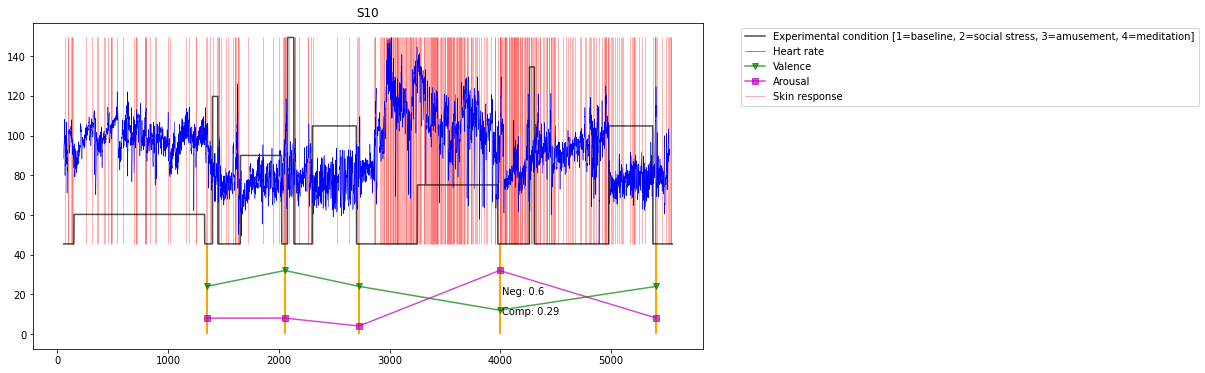

S11


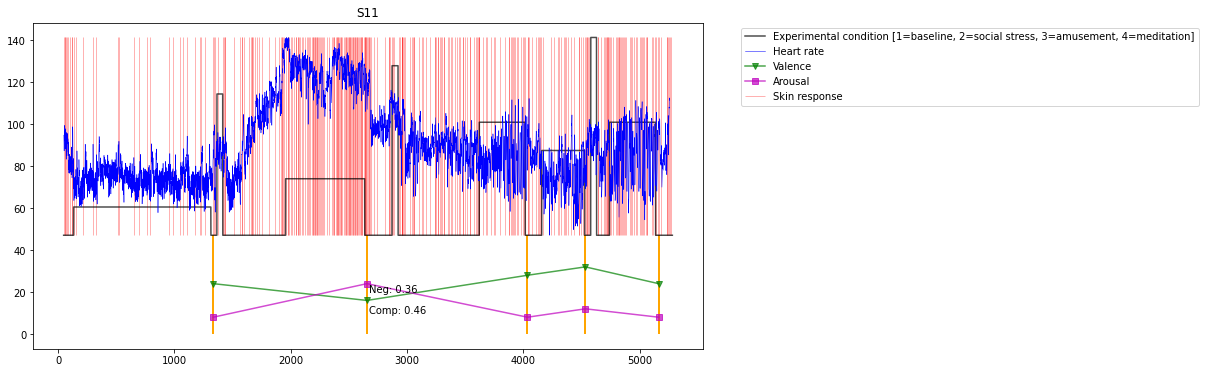

S13


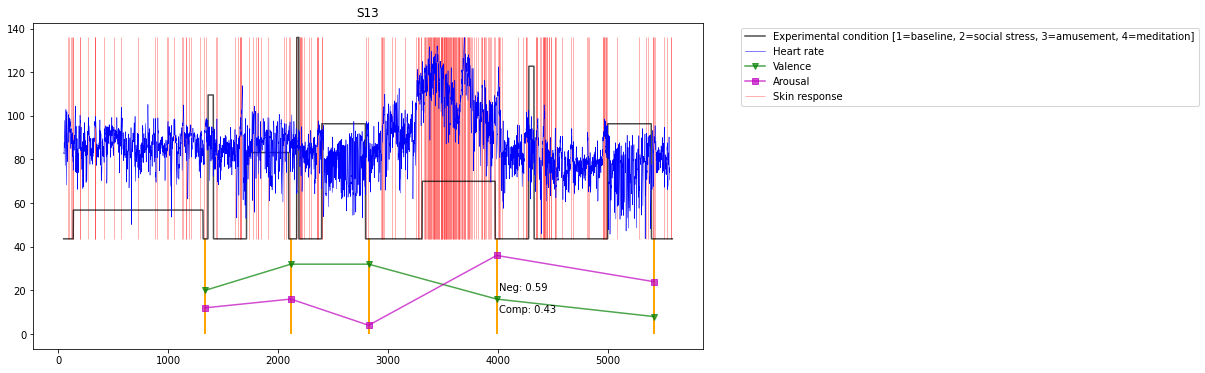

S14


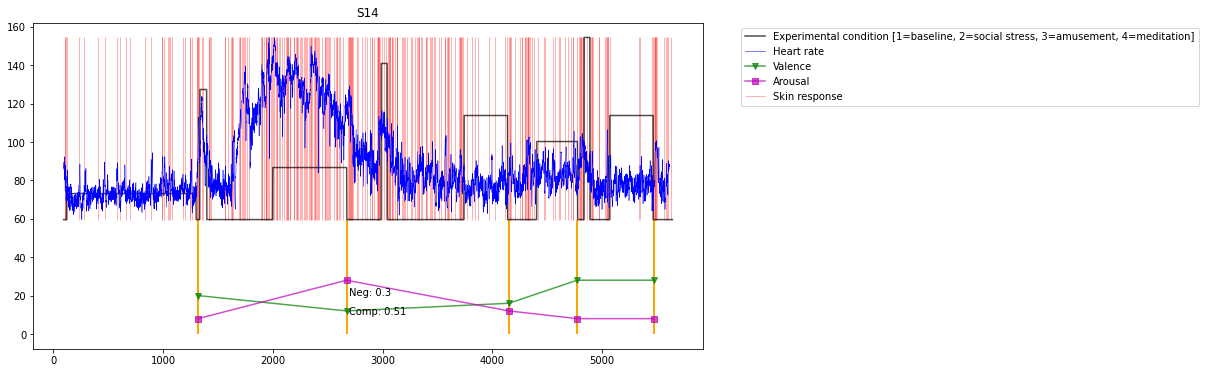

S15


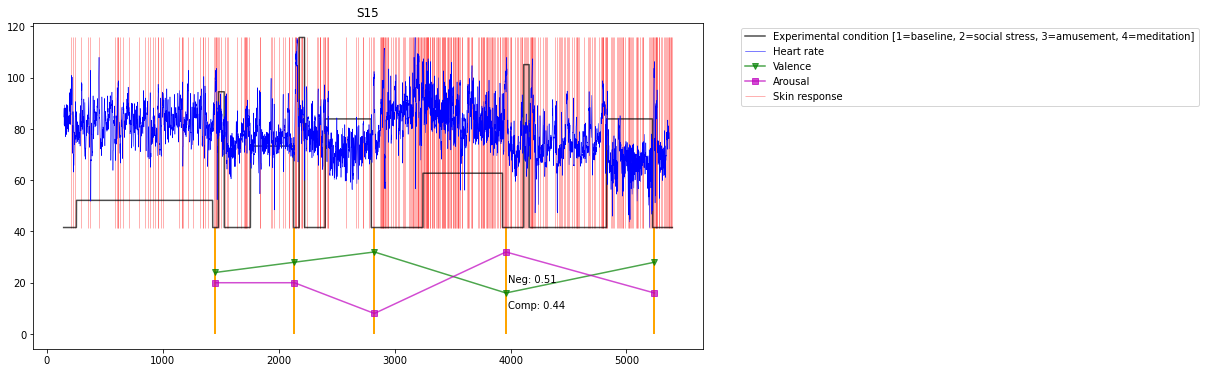

S16


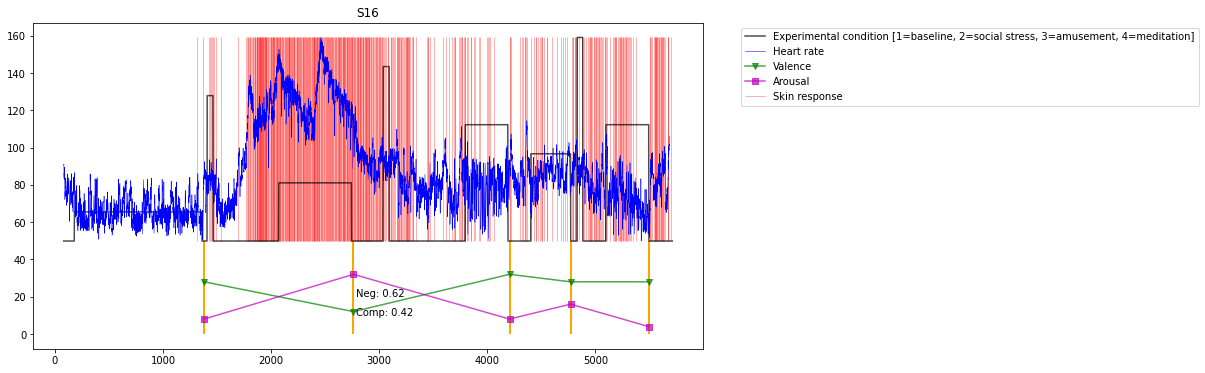

S17


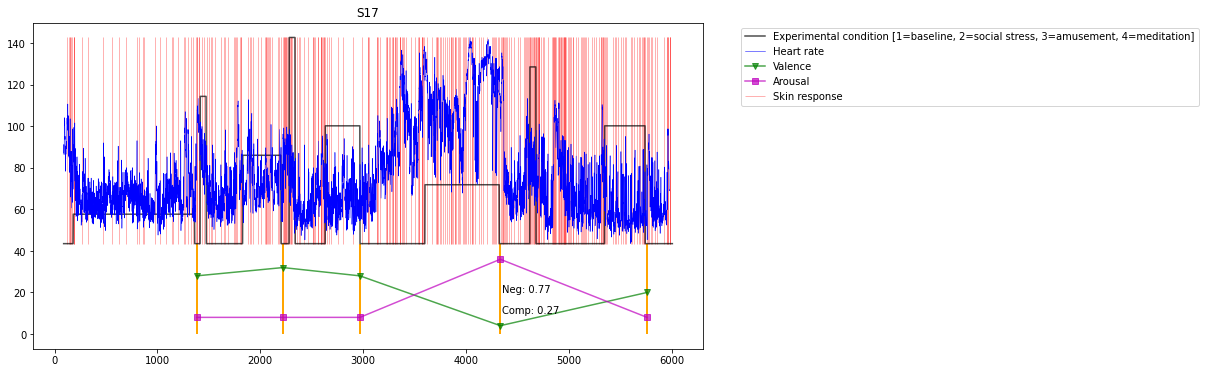

S2


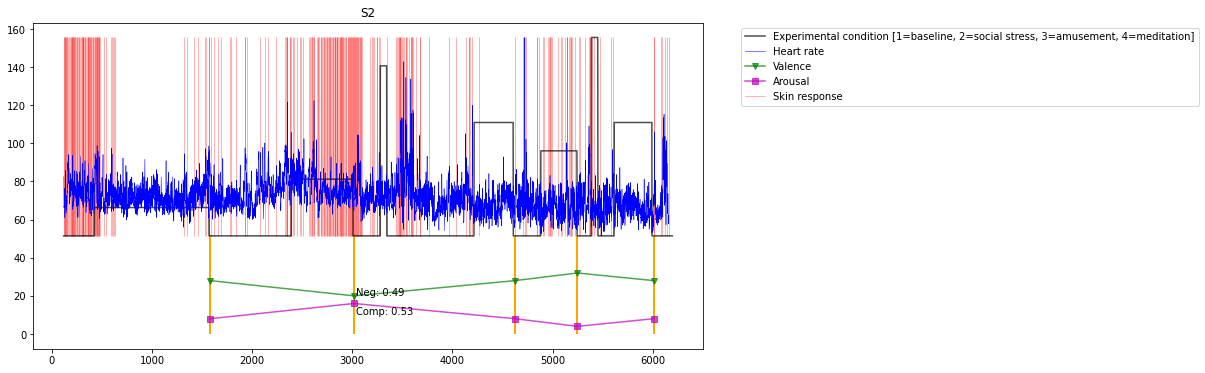

S3


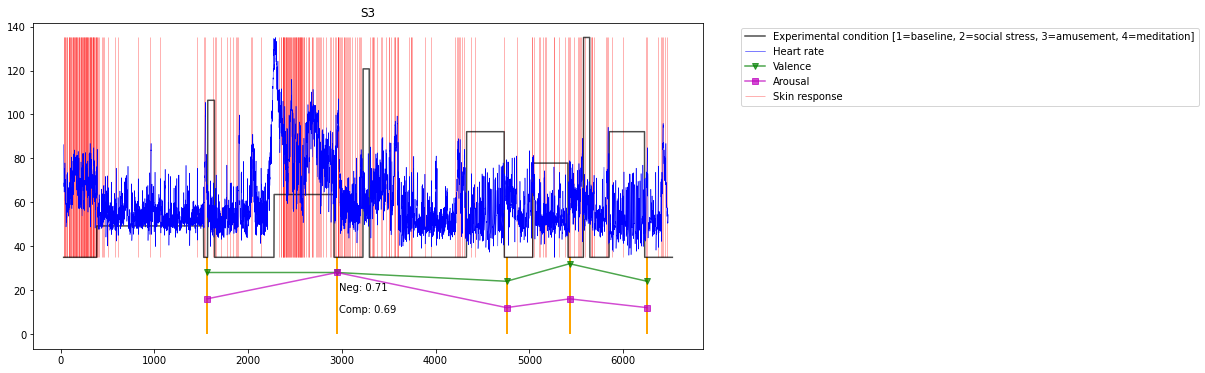

S4


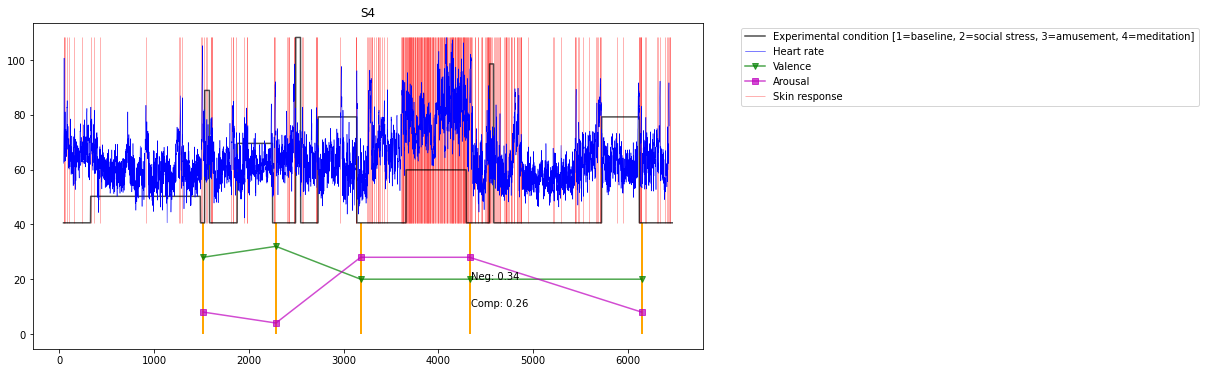

S5


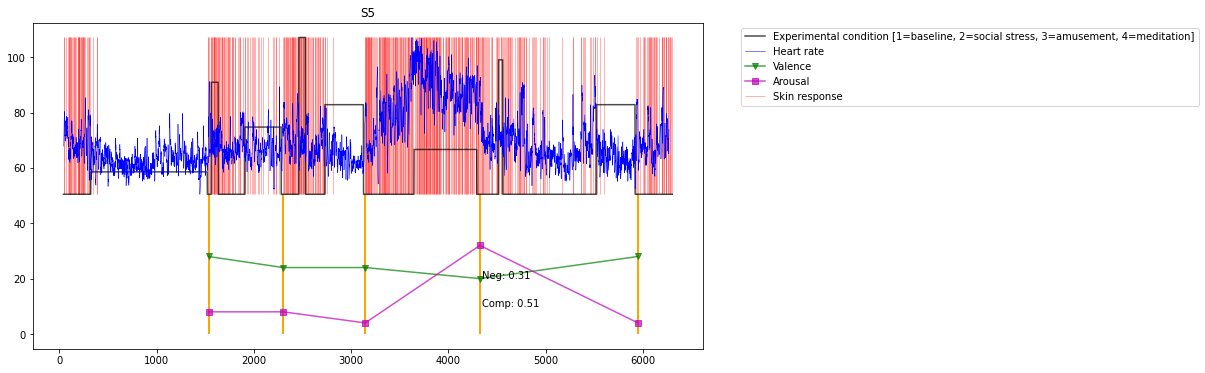

S6


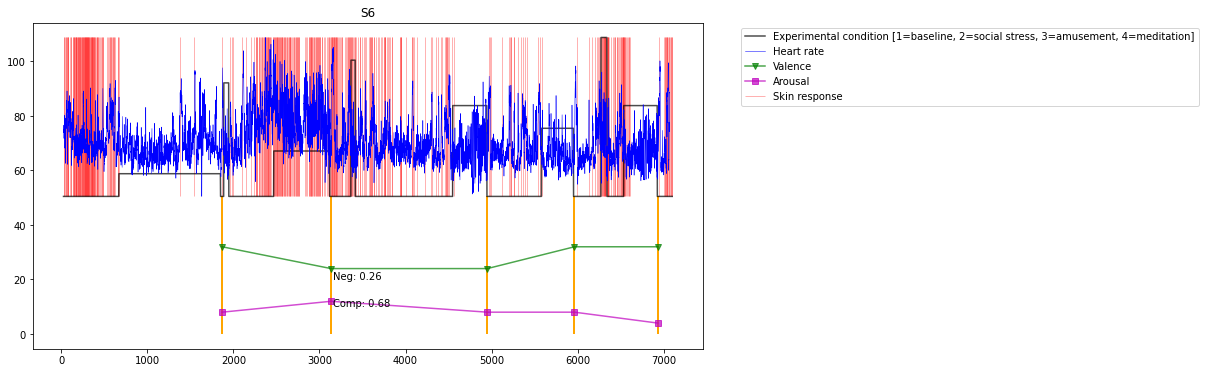

S7


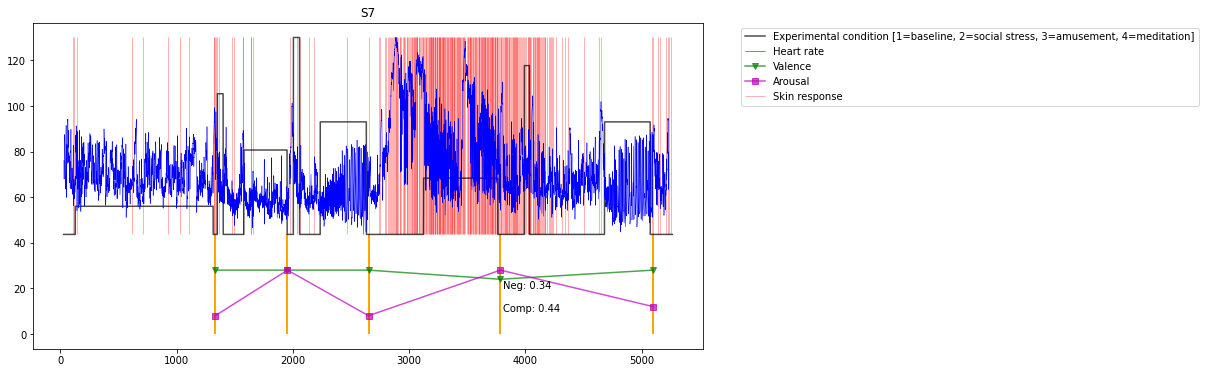

S8


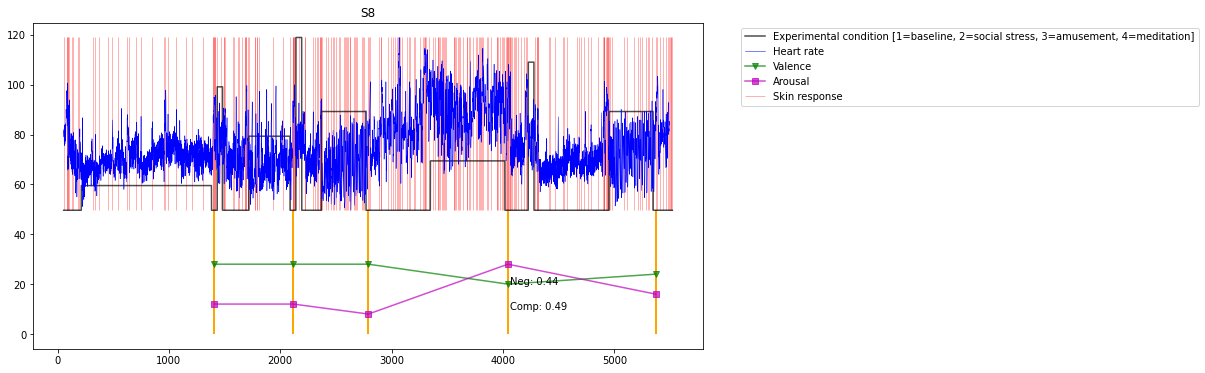

S9


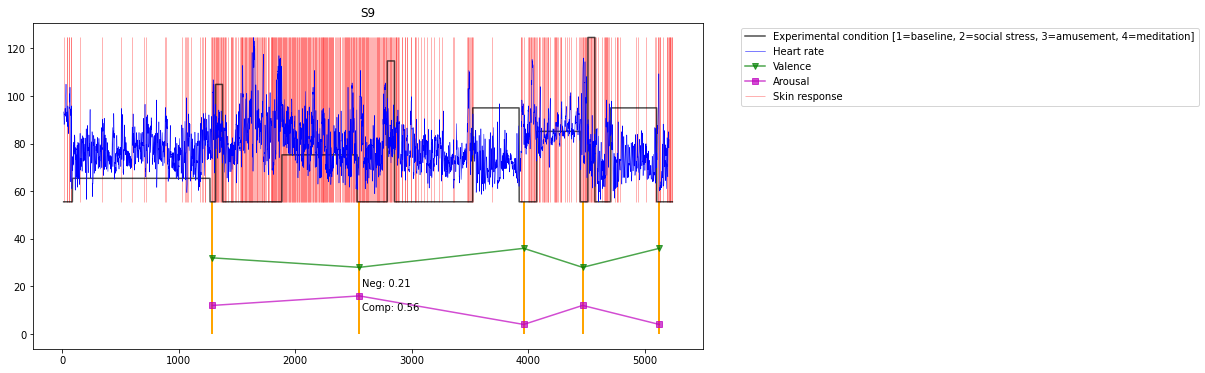

In [80]:
for Subj_ID in IBI_dict.keys():
    print(Subj_ID)
    
    Q_df = pd.read_csv(Q_dict[Subj_ID], index_col=0)
    Q_df.iloc[:2,:] = Q_df.iloc[:2,:] * 60 #+ (Q_df.loc['START','Base'] - baseline_start_seconds)
    #print(Q_df.info())
    #display(Q_df)
    baseline_start_seconds_Q = Q_df.iloc[0,0]
    #print('baseline_start_seconds_Q\t', baseline_start_seconds_Q)
    
    EDA_df = pd.read_csv(EDA_dict[Subj_ID], usecols=[1,2,3,4])
    #print(EDA_df.info())
    #display(EDA_df.head())
    
    baseline_start_seconds_EDA = EDA_df.time.loc[EDA_df.label == 1].values[0]
    #print('baseline_start_seconds_EDA\t', baseline_start_seconds_EDA)
    
    EDA_df['time'] = EDA_df['time'] + (baseline_start_seconds_Q - baseline_start_seconds_EDA)
    
    IBI_df = pd.read_csv(IBI_dict[Subj_ID], usecols=[1,2])
    IBI_df.columns=['time','IBI']
    IBI_df['time'] = IBI_df['time'] + (baseline_start_seconds_Q - baseline_start_seconds_EDA)

    #print(IBI_df.info())
    #display(IBI_df.head())
    #print('\n')
    
    
    
    
    
    
    plt.figure(figsize=[12,6])
    y_min=np.min(60/IBI_df.IBI[1:-40])
    y_max=np.max(60/IBI_df.IBI[1:-40])
    scale = y_max-y_min
    plt.vlines(x=EDA_df.time[EDA_df.GSR_boolean], ymin=y_min, ymax=y_max, color='r', lw=1, linestyle='solid', alpha=0.3, label='Skin response')
    plt.plot(EDA_df.time, EDA_df.label * scale / 7 + y_min, color='k', alpha=0.7, label='Experimental condition [1=baseline, 2=social stress, 3=amusement, 4=meditation]')
    plt.plot(IBI_df.time[1:-40], 60/IBI_df.IBI[1:-40], color='b', lw=0.5, label='Heart rate')
    
    plt.title(Subj_ID)
    
    plt.vlines(x=Q_df.loc['END',:].values.flatten(), ymin=0, ymax=y_min, lw=2, color='orange')
    
    neg_list = ['Distressed', 'Scared', 'Irritable', 'Ashamed', 'Nervous', 
                'Jittery', 'Afraid', 'Stressed', 'Frustrated',
                'I feel nervous', 'I am jittery', 'I am worried',
                'I was worried about what other people think of me', 'I felt concerned about the impression I was making']
    neg_list_max_points = [5, 5, 5, 5, 5,
                          5, 5, 5, 5,
                          4, 4, 4,
                          5, 5]
    n_list = []
    for neg, nmax in zip(neg_list, neg_list_max_points):
        frac = (Q_df.loc[neg, 'TSST'] - 1) / (nmax - 1)
        n_list.append(frac)
    n = np.mean(n_list)
    
    Competence_list = ['I was committed to attaining my performance goals', 'I was motivated to do the task', 'Valence', 
                       'Interested', 'Inspired', 'Strong', 'Excited', 'Proud', 
                       'Enthusiastic', 'Determined', 'I feel at ease', 'I feel nervous']
    comp_list_max_points = [5, 5, 9,
                           5, 5, 5, 5, 5,
                           5, 5, 4, 4]
    c_list = []
    for comp, cmax in zip(Competence_list, comp_list_max_points):
        frac = (Q_df.loc[comp, 'TSST'] - 1) / (cmax - 1)
        c_list.append(frac)
    c = np.mean(c_list)
    
    for i, t in enumerate(list(Q_df.loc['END',:].values)):
        
        if Q_df.columns[i] == 'TSST':
            plt.annotate('Neg: '+str(np.round(n,2)), xy=(Q_df.loc['END','TSST']+20, 20))
            plt.annotate('Comp: '+str(np.round(c,2)), xy=(Q_df.loc['END','TSST']+20, 10))
                         
    plt.plot(Q_df.loc['END',:].values.flatten(), 4* Q_df.loc['Valence',:], color='g', marker='v', alpha=0.7, label='Valence')
    plt.plot(Q_df.loc['END',:].values.flatten(), 4* Q_df.loc['Arousal',:], color='m', marker='s', alpha=0.7, label='Arousal')

    plt.legend(bbox_to_anchor=[1.05,1])
    plt.show()
    